# Introdução

O SINAN (Sistema de Informação de Agravos de Notificação) é um sistema do governo brasileiro destinado a coletar, reunir, organizar e disponibilizar dados referentes a diversas doenças e agravos que são de notificação obrigatória ao Ministério da Saúde, de forma a possibilitar um melhor estudo e uma melhor análise dessas informações para que, assim, possam ser tomadas as devidas atitudes com relação a determinadas enfermidades.

As hepatites virais (de código B17) são infecções que atingem o fígado, mas que normalmente são silenciosas, não sendo manifestados sintomas. No Brasil, as mais comuns são as do tipo A, B e C, com a D sendo mais comum na região norte e com a E sendo encontrada na Ásia e na África.

Devido ao seu caráter assintomático, em geral, a infecção perdura no organismo por diversos anos, tornando-se crônica. Assim, o avanço silencioso da doença resulta em um comprometimento do fígado, com o acarretamento de fibrose avançada (cicatrização excessiva do tecido hepático) ou cirrose (destruição ou mal funcionamento das células). Essas condições podem levar ao desenvolvimento de cânceres, sendo necessário o transplante do órgão.

Essa doença acarreta aproximadamente 1,4 milhão de mortes anualmente no mundo todo.

# Metodologia

Inicialmente, foi necessária a instalação das bibliotecas "pysus" e "pandas".

`pip install pysus`  
`pip install pandas`  

Em seguida, as bibliotecas foram carregadas.

`from pysus.online_data import SINAN`  
`import pandas as pd`

Após isso, foi realizado a listagem dos agravos e dos anos disponíveis.

`SINAN.list_diseases()`  
`anos = SINAN.get_available_years('Hepatites Virais')`

Escolhidos o agravo "Hepatites virais" e o ano de 2018, foi feito o carregamento dos dados.

`path = SINAN.download('Hepatites Virais', int(anos[11]))`  
`df = pd.read_parquet(path)`

Para adiantar o processo, já foi efetuada a conversão das idades da tabela.

`from pysus.preprocessing.decoders import decodifica_idade_SINAN`  
`df["IDADE"] = decodifica_idade_SINAN(df.NU_IDADE_N)`

Para encerrar, bastava salvar o banco como um arquivo csv e baixá-lo para a máquina local.

`df.to_csv("hepatites_virais.csv", index = False)`

Agora, inicia-se o processo de análise dos dados. Para isso, primeiramente, foi necessário carregar o arquivo para uma variável.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("hepatites_virais.csv")

C:\Users\pedro\AppData\Local\Temp\ipykernel_16608\1427972736.py:1: DtypeWarning: Columns (7,12,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hepatites_virais.csv")


In [3]:
df

TP_NOT ID_AGRAVO  DT_NOTIFIC  SEM_NOT  NU_ANO  SG_UF_NOT  ID_MUNICIP   
0           2      B19     20180103   201801    2018         11      110011  \
1           2      B19     20180103   201801    2018         11      110020   
2           2      B19     20180104   201801    2018         11      110004   
3           2      B19     20180105   201801    2018         11      110020   
4           2      B19     20180108   201802    2018         11      110030   
...       ...       ...         ...      ...     ...        ...         ...   
43745       2      B19     20181214   201850    2018         53      530010   
43746       2      B19     20181219   201851    2018         53      530010   
43747       2      B19     20181220   201851    2018         53      530010   
43748       2      B19     20181221   201851    2018         53      530010   
43749       2      B19     20181231   201901    2018         53      530010   

      ID_REGIONA  DT_SIN_PRI  SEM_PRI  ...  TP_SOROHCV GEN_VHC COLETAMARC   
0       1474        20171229   201752  ...           3       7   ********  \
1       1483        20180103   201801  ...           4       7   20180103   
2       1480        20180104   201801  ...           4       7   20180108   
3       1483        20171205   201749  ...           4       7   ********   
4       1479        20171206   201749  ...           4       4   20171213   
...          ...         ...      ...  ...         ...     ...        ...   
43745               20130305   201310  ...           4       7   20130305   
43746               20181219   201851  ...           4       7   ********   
43747               20181220   201851  ...           4           ********   
43748               20181213   201850  ...           4           20181213   
43749               20170223   201708  ...           4       7   20181228   

      CLASSI_FIN FORMA CLAS_ETIOL FONTE DT_ENCERRA   
0              1                          20180108  \
1              1     2         04    99   20180103   
2              1     2         02    01   20180219   
3              1     1         02    99   20180115   
4              4               03    99   20180109   
...          ...   ...        ...   ...        ...   
43745          1     2         02    99   20181214   
43746          1     4         02    08   20181219   
43747          1               03    99   20181220   
43748          1     2         03    99   20190109   
43749          1     1         02    03   20190125   

                              DSFONTE IDADE  
0                                      51.0  
1                                      63.0  
2                                      26.0  
3                                      35.0  
4                                      37.0  
...                               ...   ...  
43745                                  39.0  
43746                                  36.0  
43747                                  32.0  
43748                                  49.0  
43749                                  41.0  

[43750 rows x 80 columns]

Em seguida, era preciso conhecer os nomes das variáveis presentes na tabela.

In [4]:
df.keys()

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'NU_IDADE_N',
       'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'DT_DIGITA', 'DT_TRASSE', 'MIGRADO_W',
       'DT_INVEST', 'ID_OCUPA_N', 'HEPATITE_N', 'HEPATITA', 'HEPATITB',
       'INSTITUCIO', 'HIV', 'OUTRA_DST', 'SEXUAL', 'DOMICILI', 'OCUPACIO',
       'MEDICAMENT', 'TATU_PIER', 'MATBIOLOGI', 'INAL_CRACK', 'ACUPUNTURA',
       'TRANSFUSAO', 'INJETAVEIS', 'CIRURGICO', 'AGUA_ALIME', 'DENTARIO',
       'TRESMAIS', 'HEMODIALIS', 'TRANSPLA', 'OUTRAS', 'DT_ACIDENT',
       'CO_UF_EXP', 'CO_MUN_EXP', 'CO_UF_EX2', 'CO_MUN_EX2', 'CO_UF_EX3',
       'CO_MUN_EX3', 'BANCOSANGU', 'RES_HBSAG', 'RE_ANTIHBC', 'RE_ANTIHCV',
       'DT_COLETA', 'ANTIHAVIGM', 'ANTIHBS', 'ANTIHDVIGM', 'AGHBS', 'AGHBE',
       'ANTIHEVIGM', 'ANTIHBCIGM', 'ANTIHBE', 'ANTIHCV', 'HBC_TOTAL',
       'ANTIHDV', 'TP_SOROHCV', 'G

A partir daí, pode-se dizer que o processo foi bem semelhante em cada análise, sendo utilizados, em essência, os mesmos comandos da biblioteca "pandas", como os seguintes:

* Para agrupar em contar os valores em cada categoria:

    `<tabela_nova> = <tabela>.value_counts(<variável>).reset_index(name = <nome_da_coluna>)`

* Para renomear as categorias:

    `<tabela>.loc[<índice_da_linha>, <coluna>] = <novo_nome>`

* Para renomear as colunas:

    `<tabela> = <tabela>.rename(columns={<nome_antigo>: <nome_novo>})`

* E para plotar os gráficos:

    `<tabela>.plot.<gráfico>(x = <coluna1>, y = <coluna2>)`

Finalizada essa explicação básica, vamos às aplicações.

# Resultados

## Atividade 1

Para responder quantos casos de hepatite viral ocorreram no Brasil em 2018, basta observarmos a quantidade de linhas da tabela.

In [5]:
df.shape

(43750, 80)

Portanto, tivemos **43750** registros dessa doença no Brasil naquele ano.

## Atividade 2

Agora, para separar esse número por município, fazemos uso dos comando já apresentados anteriormente.  
Primeiramente, criamos uma nova tabela com a contagem de casos em cada município.

In [6]:
df_por_municipio = df.value_counts('ID_MUNICIP').reset_index(name = "COUNTS")
df_por_municipio

ID_MUNICIP  COUNTS
0         355030    7034
1         431490    2469
2         330455    1777
3         410690     838
4         310620     818
...          ...     ...
2102      410395       1
2103      150442       1
2104      290790       1
2105      410440       1
2106      280740       1

[2107 rows x 2 columns]

A seguir, como essa tabela possui muitas linhas para serem analisadas, vamos nos restringir a estudar apenas as 10 primeiras, ou seja, os 10 municípios com maior incidência da doença.

In [7]:
df_por_municipio_reduzida = df_por_municipio[:10]
df_por_municipio_reduzida

ID_MUNICIP  COUNTS
0      355030    7034
1      431490    2469
2      330455    1777
3      410690     838
4      310620     818
5      292740     801
6      130260     790
7      350950     519
8      354340     477
9      430460     419

Depois, utilizando o site do IBGE, vamos substituir esses códigos pelos nomes dos municípios em si. Além disso, vamos renomear nossas colunas de forma a ter nomes mais práticos.

In [8]:
df_por_municipio_reduzida.loc[0, "ID_MUNICIP"] = "São Paulo"
df_por_municipio_reduzida.loc[1, "ID_MUNICIP"] = "Porto Alegre"
df_por_municipio_reduzida.loc[2, "ID_MUNICIP"] = "Rio de Janeiro"
df_por_municipio_reduzida.loc[3, "ID_MUNICIP"] = "Curitiba"
df_por_municipio_reduzida.loc[4, "ID_MUNICIP"] = "Belo Horizonte"
df_por_municipio_reduzida.loc[5, "ID_MUNICIP"] = "Salvador"
df_por_municipio_reduzida.loc[6, "ID_MUNICIP"] = "Manaus"
df_por_municipio_reduzida.loc[7, "ID_MUNICIP"] = "Campinas"
df_por_municipio_reduzida.loc[8, "ID_MUNICIP"] = "Ribeirão Preto"
df_por_municipio_reduzida.loc[9, "ID_MUNICIP"] = "Canoas"

df_por_municipio_reduzida = df_por_municipio_reduzida.rename(columns={"ID_MUNICIP": "Município", "COUNTS": "Registros"})

df_por_municipio_reduzida

Município  Registros
0       São Paulo       7034
1    Porto Alegre       2469
2  Rio de Janeiro       1777
3        Curitiba        838
4  Belo Horizonte        818
5        Salvador        801
6          Manaus        790
7        Campinas        519
8  Ribeirão Preto        477
9          Canoas        419

E essa é a nossa tabela de dados. Notemos que a maioria dessas cidades são capitais estaduais, consequentemente com grandes populações, o que é condizente com a informação. Outro detalhe é o grande intervalo entre São Paulo e Porto Alegre, com aquele tendo quase 3 vezes mais registros.

Por fim, vamos plotar um gráfico de barras para esses dados.

<Axes: xlabel='Município'>

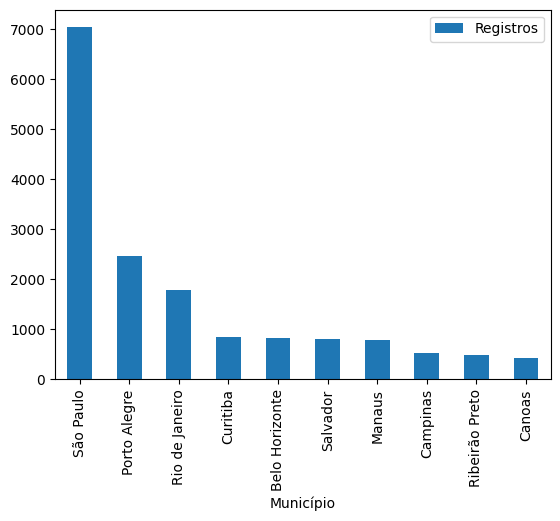

In [9]:
df_por_municipio_reduzida.plot.bar(x = "Município", y = "Registros")

## Atividade 3

Em seguida, vamos realizar esse mesmo processo, só que agora para os estados. Vamos criar a tabela de frequências e modificar seus rótulos.

In [10]:
df_por_estado = df.value_counts('SG_UF_NOT').reset_index(name = "COUNTS")
df_por_estado

SG_UF_NOT  COUNTS
0          35   14675
1          43    7015
2          41    3316
3          33    2774
4          31    2762
5          42    2589
6          29    1716
7          13    1042
8          11     778
9          15     738
10         51     718
11         52     667
12         32     585
13         21     516
14         12     515
15         23     508
16         26     450
17         50     404
18         27     326
19         53     309
20         28     257
21         25     244
22         24     220
23         14     207
24         17     177
25         22     161
26         16      81

In [11]:
df_por_estado.loc[0, "SG_UF_NOT"] = "SP"
df_por_estado.loc[1, "SG_UF_NOT"] = "RS"
df_por_estado.loc[2, "SG_UF_NOT"] = "PR"
df_por_estado.loc[3, "SG_UF_NOT"] = "RJ"
df_por_estado.loc[4, "SG_UF_NOT"] = "MG"
df_por_estado.loc[5, "SG_UF_NOT"] = "SC"
df_por_estado.loc[6, "SG_UF_NOT"] = "BA"
df_por_estado.loc[7, "SG_UF_NOT"] = "AM"
df_por_estado.loc[8, "SG_UF_NOT"] = "RO"
df_por_estado.loc[9, "SG_UF_NOT"] = "PA"
df_por_estado.loc[10, "SG_UF_NOT"] = "MT"
df_por_estado.loc[11, "SG_UF_NOT"] = "GO"
df_por_estado.loc[12, "SG_UF_NOT"] = "ES"
df_por_estado.loc[13, "SG_UF_NOT"] = "MA"
df_por_estado.loc[14, "SG_UF_NOT"] = "AC"
df_por_estado.loc[15, "SG_UF_NOT"] = "CE"
df_por_estado.loc[16, "SG_UF_NOT"] = "PE"
df_por_estado.loc[17, "SG_UF_NOT"] = "MS"
df_por_estado.loc[18, "SG_UF_NOT"] = "AL"
df_por_estado.loc[19, "SG_UF_NOT"] = "DF"
df_por_estado.loc[20, "SG_UF_NOT"] = "SE"
df_por_estado.loc[21, "SG_UF_NOT"] = "PB"
df_por_estado.loc[22, "SG_UF_NOT"] = "RN"
df_por_estado.loc[23, "SG_UF_NOT"] = "RR"
df_por_estado.loc[24, "SG_UF_NOT"] = "TO"
df_por_estado.loc[25, "SG_UF_NOT"] = "PI"
df_por_estado.loc[26, "SG_UF_NOT"] = "AP"

df_por_estado = df_por_estado.rename(columns={"SG_UF_NOT": "Estado", "COUNTS": "Registros"})

df_por_estado

Estado  Registros
0      SP      14675
1      RS       7015
2      PR       3316
3      RJ       2774
4      MG       2762
5      SC       2589
6      BA       1716
7      AM       1042
8      RO        778
9      PA        738
10     MT        718
11     GO        667
12     ES        585
13     MA        516
14     AC        515
15     CE        508
16     PE        450
17     MS        404
18     AL        326
19     DF        309
20     SE        257
21     PB        244
22     RN        220
23     RR        207
24     TO        177
25     PI        161
26     AP         81

Novamente, notemos o imenso espaço entre São Paulo e Rio Grande do Sul: o primeiro possui mais que o dobro do segundo.  
Vamos gerar um gráfico para esses valores.

<Axes: xlabel='Estado'>

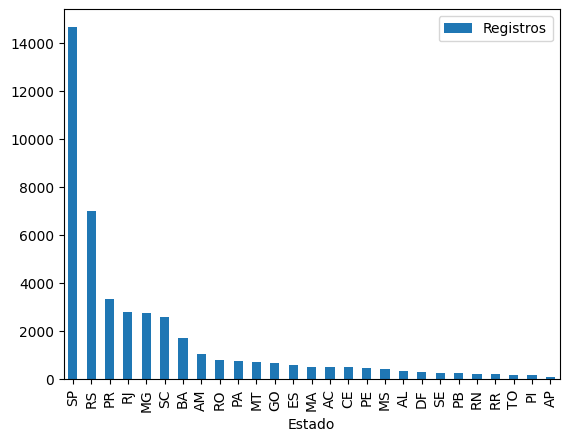

In [12]:
df_por_estado.plot.bar(x = "Estado", y = "Registros")

## Atividade 4

Essa questão tem um diferencial, pois não temos uma coluna com os meses de cada registro. Assim, será necessário que criemos uma.  
Para isso, geremos uma coluna com os valores 4 e 5 da string correspondente à data da coluna "DT_NOTIFIC", números esses que indicam justamente o mês.

In [13]:
df["MES"] = df["DT_NOTIFIC"].apply(lambda x: str(x)[4:6])
df["MES"]

0        01
1        01
2        01
3        01
4        01
         ..
43745    12
43746    12
43747    12
43748    12
43749    12
Name: MES, Length: 43750, dtype: object

Agora, basta realizarmos o mesmo processo de antes, apenas com a diferença de que reordenaremos a tabela de frequência para que os meses apareçam em sequência, o que faz mais sentido, já que eles correspondem a uma linha temporal.

In [14]:
df_por_mes = df.value_counts("MES").reset_index(name = "COUNT")
df_por_mes

MES  COUNT
0   08   4515
1   10   3998
2   07   3955
3   05   3751
4   03   3727
5   01   3645
6   04   3628
7   06   3617
8   09   3409
9   11   3405
10  02   3176
11  12   2924

In [15]:
df_por_mes = df_por_mes.sort_values(by = "MES")
df_por_mes = df_por_mes.rename(columns={"MES": "Mês", "COUNT": "Registros"})
df_por_mes

Mês  Registros
5   01       3645
10  02       3176
4   03       3727
6   04       3628
3   05       3751
7   06       3617
2   07       3955
0   08       4515
8   09       3409
1   10       3998
9   11       3405
11  12       2924

A partir da tabela e do gráfico abaixo, é possível perceber o acentuado número de casos em agosto, o que é curiosamente precedido e sucedido por quedas.

<Axes: xlabel='Mês'>

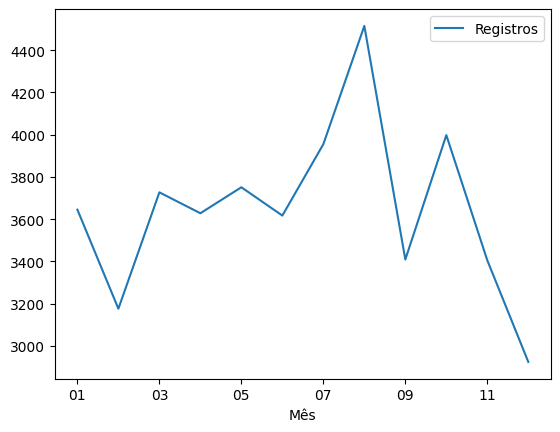

In [16]:
df_por_mes.plot.line(x = "Mês", y = "Registros")

## Atividade 5

Como já fizemos a conversão das idades anteriormente, então já temos a coluna com essa informação. No entanto, realizar essa análise considerando cada idade individualmente não seria muito prático. Assim, vamos criar mais uma coluna no nosso dataframe. Ela conterá a faixa etária de cada registro, indicando em que dezena essas idades se encontram, o que reduz consideravelmente nossas categorias.  
Após isso, o mesmo processo se repete.

In [17]:
df["FAIXA_ETARIA"] = df["IDADE"].apply(lambda x: (int(x/10))*10)
df["FAIXA_ETARIA"]

0        50
1        60
2        20
3        30
4        30
         ..
43745    30
43746    30
43747    30
43748    40
43749    40
Name: FAIXA_ETARIA, Length: 43750, dtype: int64

In [18]:
df_por_idade = df.value_counts("FAIXA_ETARIA").reset_index(name = "COUNT")
df_por_idade

FAIXA_ETARIA  COUNT
0             50  10367
1             40   9504
2             30   8050
3             60   6549
4             20   4880
5             70   2372
6             10    930
7             80    613
8              0    447
9             90     37
10           100      1

In [19]:
df_por_idade = df_por_idade.sort_values(by = "FAIXA_ETARIA")
df_por_idade = df_por_idade.rename(columns={"FAIXA_ETARIA": "Faixa etária", "COUNT": "Registros"})
df_por_idade

Faixa etária  Registros
8              0        447
6             10        930
4             20       4880
2             30       8050
1             40       9504
0             50      10367
3             60       6549
5             70       2372
7             80        613
9             90         37
10           100          1

<Axes: xlabel='Faixa etária'>

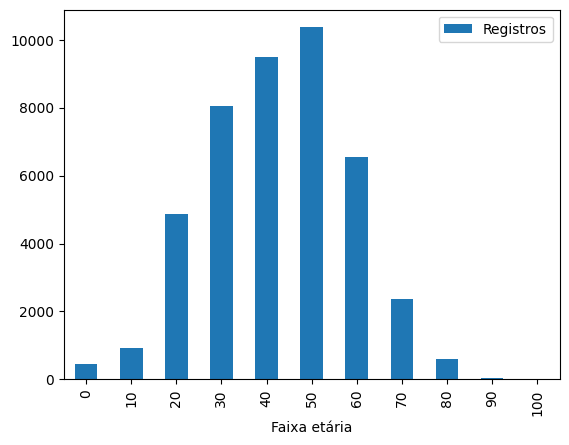

In [20]:
df_por_idade.plot.bar(x = "Faixa etária", y = "Registros")

Observa-se uma concentração dos casos de hepatite viral em pessoas com idade entre 40 e 60 anos. Isso pode ser resultado do fato de essa doença ser silenciosa e poder só ser percebida depois de muitos anos, quando os danos ao fígado já são graves.

## Atividade 6

Nossa análise por sexo não tem nada de especial. Apenas o mesmo procedimento.

In [21]:
df_por_sexo = df.value_counts("CS_SEXO").reset_index(name = "COUNT")
df_por_sexo

CS_SEXO  COUNT
0       M  24580
1       F  19155
2       I     15

In [22]:
df_por_sexo.loc[0, "CS_SEXO"] = "Masculino"
df_por_sexo.loc[1, "CS_SEXO"] = "Feminino"
df_por_sexo.loc[2, "CS_SEXO"] = "Ignorado"

df_por_sexo = df_por_sexo.rename(columns={"CS_SEXO": "Sexo", "COUNT": "Registros"})

df_por_sexo

Sexo  Registros
0  Masculino      24580
1   Feminino      19155
2   Ignorado         15

Percebe-se que não há muita diferença entre as quantidades de casos em homens e em mulheres.

<Axes: xlabel='Sexo'>

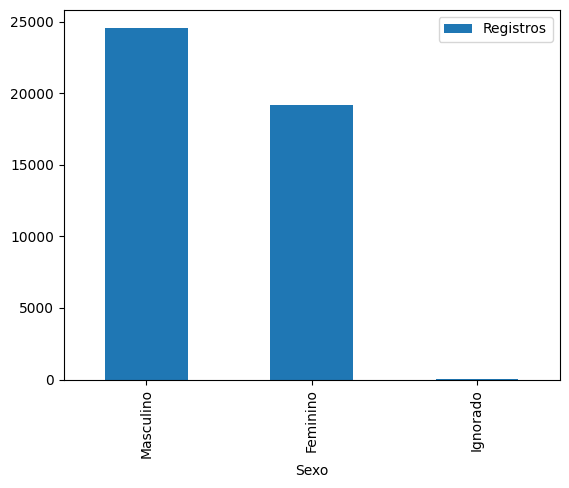

In [23]:
df_por_sexo.plot.bar(x = "Sexo", y = "Registros")

## Atividade 7

Por último, nossa análise será por raça/cor.

In [24]:
df_por_raca = df.value_counts("CS_RACA").reset_index(name = "COUNT")
df_por_raca

CS_RACA  COUNT
0       1  20755
1       4  13692
2       9   4458
3       2   3931
4       3    410
5            334
6       5    170

In [25]:
df_por_raca.loc[0, "CS_RACA"] = "Branca"
df_por_raca.loc[1, "CS_RACA"] = "Parda"
df_por_raca.loc[2, "CS_RACA"] = "Ignorado"
df_por_raca.loc[3, "CS_RACA"] = "Preta"
df_por_raca.loc[4, "CS_RACA"] = "Amarela"
df_por_raca.loc[5, "CS_RACA"] = "NA"
df_por_raca.loc[6, "CS_RACA"] = "Indígena"

df_por_raca = df_por_raca.rename(columns={"CS_RACA": "Raça/Cor", "COUNT": "Registros"})

df_por_raca

Raça/Cor  Registros
0    Branca      20755
1     Parda      13692
2  Ignorado       4458
3     Preta       3931
4   Amarela        410
5        NA        334
6  Indígena        170

<Axes: xlabel='Raça/Cor'>

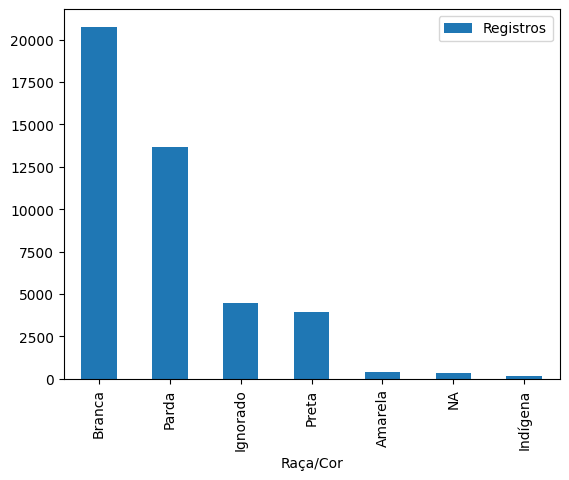

In [26]:
df_por_raca.plot.bar(x = "Raça/Cor", y = "Registros")

É evidente um predomínio dos casos de hepatite viral entre brasileiros brancos e pardos. Mas isso muito provavelmente é reflexo da composição étnica brasileira, com a maioria pertencendo a essas duas categorias.

# Conclusão

Portanto, conclui-se que as hepatites virais são um problema sério que impacta não apenas o Brasil, mas o mundo todo. Apesar de ser uma doença por muito tempo assintomática, ela não é inofensiva, causando danos aos fígados dos infectados continuamente. Assim, é necessária uma atitude das autoridades no que diz respeito a esse assunto, o que pode ocorrer na forma de projetos de concientização, para que a população se vacine e evite meios de contaminação, como relações sexuais sem preservativo, reutilização de materiais como agulhas e ingestão de água e alimentos contaminados.